In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)


maxlen = 500
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Split train val
X_val = X_train[:10000]
y_val = y_train[:10000]
X_train = X_train[10000:]
y_train = y_train[10000:]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

model = Sequential()

# couche d'entrée
model.add(Dense(128, activation='relu', input_shape=(maxlen,)))

# couche cachée
model.add(Dense(128, activation='relu'))

#  couche de sortie
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=20, batch_size=512,
    validation_data=(X_val, y_val)
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4940 - loss: 293.0257 - val_accuracy: 0.5035 - val_loss: 99.3280
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5418 - loss: 69.6885 - val_accuracy: 0.5067 - val_loss: 77.5736
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5970 - loss: 41.4433 - val_accuracy: 0.4892 - val_loss: 48.8056
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6537 - loss: 22.7875 - val_accuracy: 0.4975 - val_loss: 55.6601
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6864 - loss: 17.9300 - val_accuracy: 0.4998 - val_loss: 40.1972
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7428 - loss: 10.6486 - val_accuracy: 0.4980 - val_loss: 38.7052
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8035 - loss: 6.4493 - val_accuracy: 0.4993 - val_loss: 37.8706
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8281 - loss: 4.7488 - val_accura

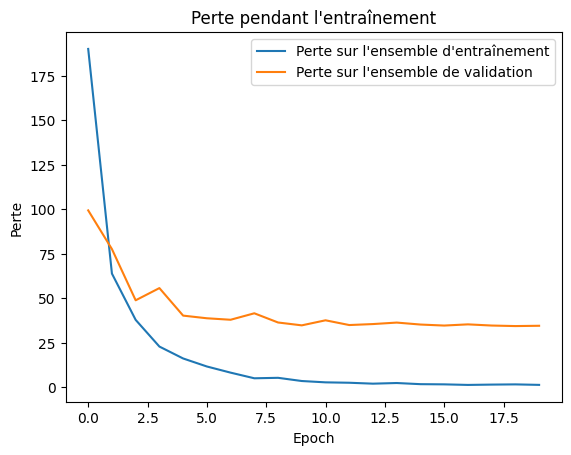

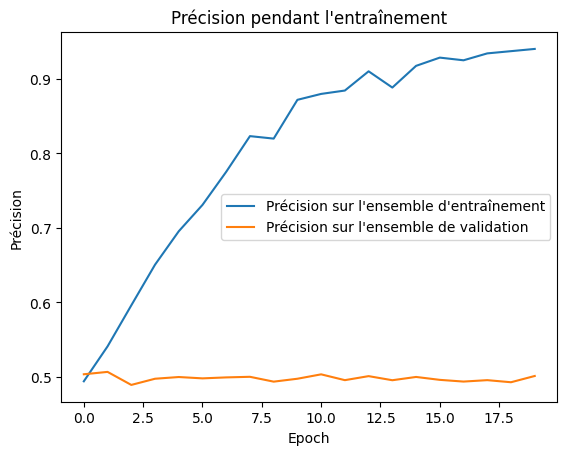

In [ ]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'], label='Perte sur l\'ensemble d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte sur l\'ensemble de validation')
plt.title('Perte pendant l\'entraînement')
plt.xlabel('Epoch')
plt.ylabel('Perte')
plt.legend()
plt.show()

# Plot courbe de la précision
plt.plot(history.history['accuracy'], label='Précision sur l\'ensemble d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Précision sur l\'ensemble de validation')
plt.title('Précision pendant l\'entraînement')
plt.xlabel('Epoch')
plt.ylabel('Précision')
plt.legend()
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Perte sur l'ensemble de test: {test_loss:.4f}")
print(f"Précision sur l'ensemble de test: {test_acc:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5034 - loss: 32.8078
Perte sur l'ensemble de test: 33.0127
Précision sur l'ensemble de test: 0.5043
